**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [1]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
# s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
# pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)

# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

In [3]:
# for reproducibility
np.random.seed(999)
# use numpy to set the exogenous variable
x = np.linspace(10,100,10)
# use the written function to get y from x with slope = 0.8
y = line(a=0.8,x=x,b=0,errors=errors)
y_errors = errors(y)

Text(0.5,1,'y = 0.8*x with uncertainties as errorbars')

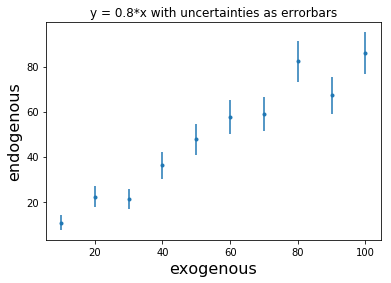

In [4]:
# plot the points with error bar
plt.errorbar(x, y, fmt='.', yerr=y_errors)
plt.xlabel('exogenous', fontsize = 16)
plt.ylabel('endogenous', fontsize = 16)
plt.title('y = 0.8*x with uncertainties as errorbars')

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [5]:
y

array([ 10.71666942,  22.17418976,  21.19291462,  36.20994954,
        47.62726203,  57.45279896,  58.99602973,  82.40663886,
        67.20065268,  86.01607606])

In [6]:
x

array([  10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,   90.,  100.])

In [7]:
x_add_constant = sm.add_constant(x)
x_add_constant

array([[   1.,   10.],
       [   1.,   20.],
       [   1.,   30.],
       [   1.,   40.],
       [   1.,   50.],
       [   1.,   60.],
       [   1.,   70.],
       [   1.,   80.],
       [   1.,   90.],
       [   1.,  100.]])

# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [8]:
#THE WRONG WAY
smfit_wrong = smf.OLS(y, x).fit()
smfit_wrong.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     692.7
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           7.97e-10
Time:                        22:16:29   Log-Likelihood:                -32.460
No. Observations:                  10   AIC:                             66.92
Df Residuals:                       9   BIC:                             67.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.8788      0.033     26.319      0.000         0.803     0.954
==============================================================================
Omnibus:                        0.959   Durbin-Watson:                   2.826
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                0.099
Skew:                          -0.243   Prob(JB):                        0.952
Kurtosis:                       3.008   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#THE RIGHT WAY
smfit_right = smf.OLS(y, sm.add_constant(x)).fit()
smfit_right.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     125.7
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           3.59e-06
Time:                        22:16:29   Log-Likelihood:                -32.187
No. Observations:                  10   AIC:                             68.37
Df Residuals:                       8   BIC:                             68.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          3.0949      4.619      0.670      0.522        -7.558    13.747
x1             0.8346      0.074     11.211      0.000         0.663     1.006
==============================================================================
Omnibus:                        1.167   Durbin-Watson:                   2.981
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                0.065
Skew:                           0.181   Prob(JB):                        0.968
Kurtosis:                       3.156   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Answer:

1)R-squared is a statistical measure of how well the regression line approximates the real data points and its range is 0-1. The wrong way has the better regression line.

2)Df Residuals means degrees of freedom of the residuals. Equal to the number of observations - number of parameters. So the less Df Residuals indicated that the difference between observations and parameter is less. Obviously, the right way has the smaller Df Residuals.

3)F-statistic is a measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals. So the right way has the less value of F-statistic.

# 4. plot the data (as points) and both statsmodels fits

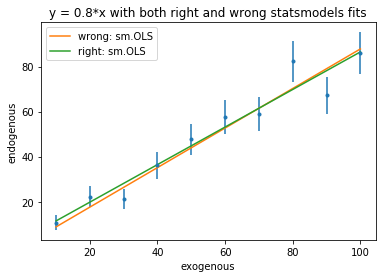

In [10]:
pl.errorbar(x, y, yerr=y_errors, fmt='.')
pl.plot(x, smfit_wrong.fittedvalues, '-', label="wrong: sm.OLS")
pl.plot(x, smfit_right.fittedvalues, '-', label="right: sm.OLS")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.title('y = 0.8*x with both right and wrong statsmodels fits')
plt.legend(loc='upper left')

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [11]:
y2 = line(a=0.8,x=x,b=80,errors=errors)

Text(0.5,1,'y = 0.8*x + 80 with uncertainties as errorbars')

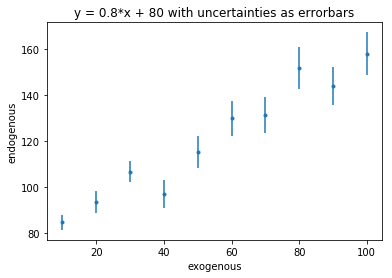

In [12]:
plt.errorbar(x, y2, fmt='.', yerr=y_errors)
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.title('y = 0.8*x + 80 with uncertainties as errorbars')

# 6. repeat step 3

In [13]:
#THE WRONG WAY
smfit2_wrong = smf.OLS(y2, x).fit()
smfit2_wrong.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     98.87
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           3.75e-06
Time:                        22:16:33   Log-Likelihood:                -49.952
No. Observations:                  10   AIC:                             101.9
Df Residuals:                       9   BIC:                             102.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.9090      0.192      9.943      0.000         1.475     2.343
==============================================================================
Omnibus:                        0.544   Durbin-Watson:                   0.162
Prob(Omnibus):                  0.762   Jarque-Bera (JB):                0.508
Skew:                           0.003   Prob(JB):                        0.776
Kurtosis:                       1.896   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#THE WRONG WAY
smfit2_right = smf.OLS(y2, sm.add_constant(x)).fit()
smfit2_right.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     127.1
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           3.44e-06
Time:                        22:16:33   Log-Likelihood:                -31.969
No. Observations:                  10   AIC:                             67.94
Df Residuals:                       8   BIC:                             68.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         76.1378      4.520     16.845      0.000        65.715    86.561
x1             0.8213      0.073     11.275      0.000         0.653     0.989
==============================================================================
Omnibus:                        0.689   Durbin-Watson:                   2.825
Prob(Omnibus):                  0.708   Jarque-Bera (JB):                0.163
Skew:                          -0.295   Prob(JB):                        0.922
Kurtosis:                       2.797   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

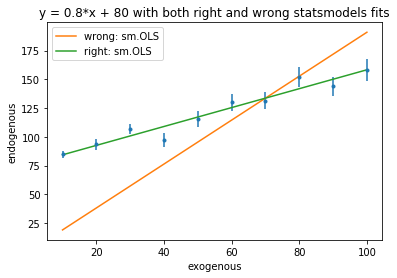

In [15]:
pl.errorbar(x, y2, yerr=y_errors, fmt='.')
pl.plot(x, smfit2_wrong.fittedvalues, '-', label="wrong: sm.OLS")
pl.plot(x, smfit2_right.fittedvalues, '-', label="right: sm.OLS")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.title('y = 0.8*x + 80 with both right and wrong statsmodels fits')
plt.legend(loc='upper left')

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [16]:
mod_wls = sm.WLS(y, x)
res_wls = mod_wls.fit()
print(res_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            WLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     692.7
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           7.97e-10
Time:                        22:16:35   Log-Likelihood:                -32.460
No. Observations:                  10   AIC:                             66.92
Df Residuals:                       9   BIC:                             67.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.8788      0.033     26.319      0.0

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

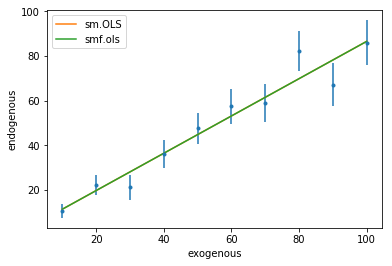

In [17]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfit_right.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();